<a href="https://colab.research.google.com/github/hbbell333/Interpretable-ML/blob/main/Henry_InterpretableML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.


Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.


Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.


Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.


Model Comparison: Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.

In [134]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.5 MB/s eta 0:00:00


In [135]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
from scipy.stats import shapiro
import pygam






In [136]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter


# Load the latest version
dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  path="WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

print("First 5 records:", dataset.head())


/tmp/ipython-input-1882291314.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  dataset = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

In [137]:
# Residual Plot function
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()



In [138]:
df = dataset.copy()



#clean up some of the features

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

#one hot encode categorical features
df = pd.get_dummies(df, columns=['Contract'], prefix=['Contract'])
df = pd.get_dummies(df, columns=['PaymentMethod'], prefix=['PaymentMethod'])
df = pd.get_dummies(df, columns=['InternetService'], prefix=['InternetService'])


df.dropna(inplace=True)



#split into test and train set
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)









**Exploratory data analysis to check assumptions**

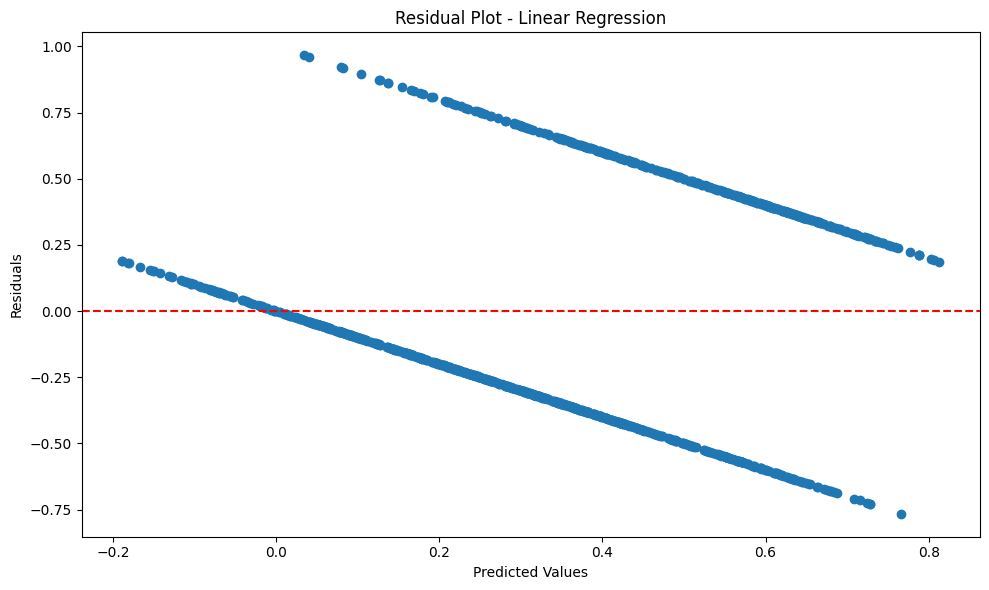

In [139]:

# Select only numerical columns for linear regression
numerical_cols = df_train.select_dtypes(include=np.number).columns


#set up test set
y_test = df_test['Churn']
df_test = df_test[numerical_cols].drop('Churn', axis=1)

#train set
X = df_train[numerical_cols].drop('Churn', axis=1)
y = df_train['Churn']


##Check for linearity by plotting residuals

model = LinearRegression()
model.fit(X, y)

lr_pred = model.predict(df_test)

plot_residuals(y_test, lr_pred, 'Linear Regression')





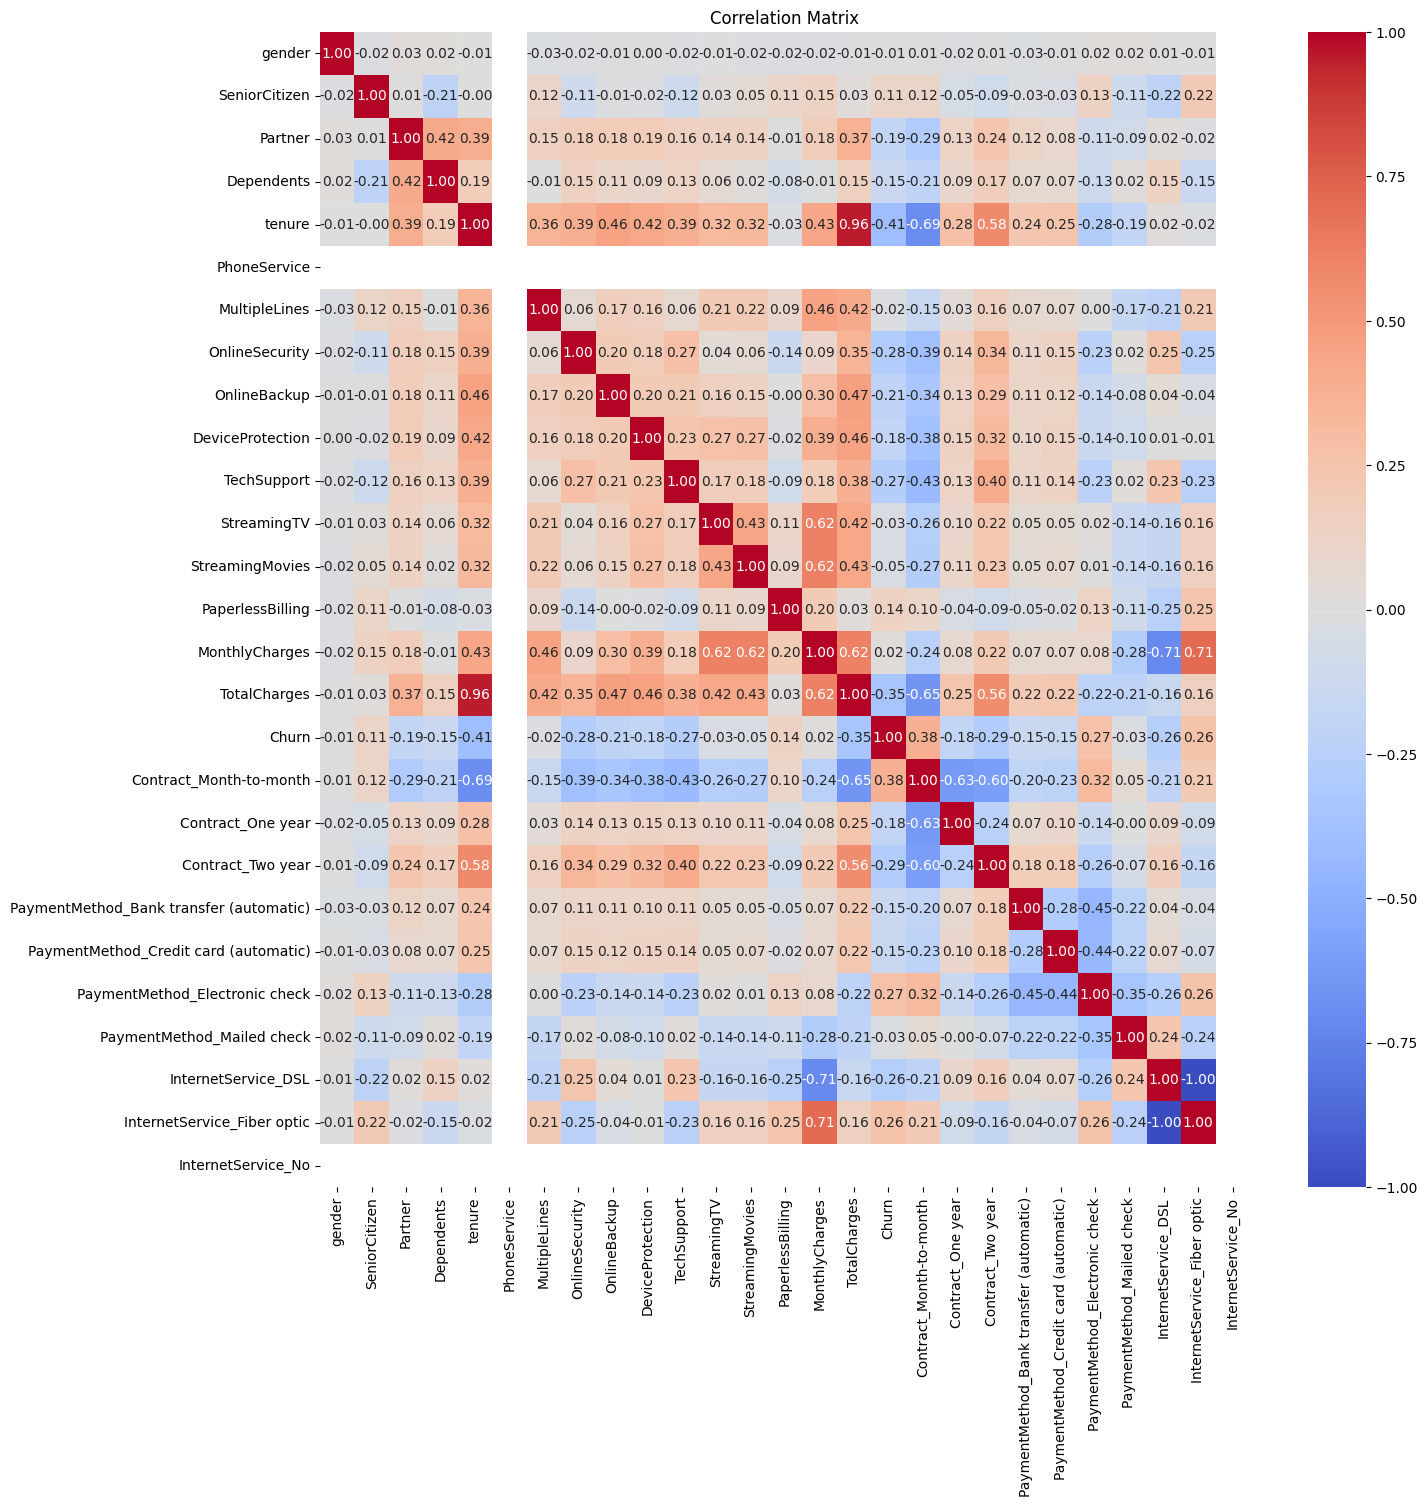

In [140]:
try:
  df_train.drop('customerID', axis=1, inplace=True)
except Exception as e:
  print(e)

correlation_matrix = df_train.corr()



plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We we can see that the residual plot has no curves, so the relationship between predictors & target is linear.

The Correlation matrix shows us that tenure and monthly charges are both highly correlated to multiple other features, so they will be removed in our final model.


In [141]:
test_model = ols('Churn ~ gender + Partner + Dependents + PhoneService + MultipleLines + OnlineSecurity + OnlineBackup + PaperlessBilling + StreamingTV + TechSupport + StreamingMovies + DeviceProtection + SeniorCitizen + tenure + MonthlyCharges + TotalCharges', data=df_train).fit()


print(durbin_watson(test_model.resid))

print(test_model.model.exog_names)
het_test = (het_breuschpagan(test_model.resid, test_model.model.exog))

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

print(lzip(names, het_test))


print(shapiro(test_model.resid))


1.9898731715447167
['Intercept', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'StreamingTV', 'TechSupport', 'StreamingMovies', 'DeviceProtection', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
[('Lagrange multiplier statistic', np.float64(473.9986027515511)), ('p-value', np.float64(1.0145506046173049e-90)), ('f-value', np.float64(35.86788302851785)), ('f p-value', np.float64(6.532049753179197e-98))]
ShapiroResult(statistic=np.float64(0.959701309855424), pvalue=np.float64(1.7444036204201273e-31))


Since the durbin watson test values is 1.98, we have reason to believe there is independence of observations.

Since the het breuchpagen test returned a small p value, we can assume homoscedasticity.

Similarly, since the shapiro test returned a small p values, we can assume the data is normally distributed.


**Linear regression model**

In [142]:
#drop the correlated features before building the final linear regression model

try:
  df_train.drop(['tenure', 'MonthlyCharges'], axis=1, inplace=True)
  df_test.drop(['tenure', 'MonthlyCharges'], axis=1, inplace=True)
  X.drop(['tenure', 'MonthlyCharges'], axis=1, inplace=True)

except Exception as e:
  print(e)


final_lr_model = LinearRegression()
final_lr_model.fit(X, y)


LinearRegression()

In [143]:
#Make predictions and report error

final_lr_pred = final_lr_model.predict(df_test)

error = mean_squared_error(y_test, final_lr_pred)
print(f'Linear regression mean Squared Error: {error}')

Linear regression mean Squared Error: 0.17872300878400066


In [164]:
for i in range(len(X.columns)):
  print(f'{X.columns[i]}: {final_log_reg.coef_[0][i]}')


gender: -0.07495598595838898
SeniorCitizen: 0.3732559105360922
Partner: -0.1783258027991529
Dependents: -0.2285227363049436
PhoneService: -0.09108159182547665
MultipleLines: 0.49065930903939664
OnlineSecurity: -0.6686812850251308
OnlineBackup: -0.1964260095683773
DeviceProtection: -0.11402350527104918
TechSupport: -0.6332853622288344
StreamingTV: 0.458823459308023
StreamingMovies: 0.34526142612135674
PaperlessBilling: 0.5338167470585692
TotalCharges: -0.0003782304457505697


We can see that Techsupport, MultipleLines, and PaperlessBilling are all relatively important features in this model's predictions. PhoneService and gender are pretty unimpactful, and TotalCharges seems to be very unimportant and should probably be removed from the model.

**Logistic regression model**

In [155]:
#Train logistic model with final features, make predictions, and report error

log_y = y.copy()
final_log_reg = LogisticRegression(max_iter = 1000)
final_log_reg.fit(X, y)

final_log_preds = final_log_reg.predict(df_test)

error = mean_squared_error(y_test, final_log_preds)
print(f'Logistic regression mean Squared Error: {error}')


Logistic regression mean Squared Error: 0.27197518097207857


In [163]:
#print logistic regression coefficients, with their features

for i in range(len(X.columns)):
  print(f'{X.columns[i]}: {final_log_reg.coef_[0][i]}')


gender: -0.07495598595838898
SeniorCitizen: 0.3732559105360922
Partner: -0.1783258027991529
Dependents: -0.2285227363049436
PhoneService: -0.09108159182547665
MultipleLines: 0.49065930903939664
OnlineSecurity: -0.6686812850251308
OnlineBackup: -0.1964260095683773
DeviceProtection: -0.11402350527104918
TechSupport: -0.6332853622288344
StreamingTV: 0.458823459308023
StreamingMovies: 0.34526142612135674
PaperlessBilling: 0.5338167470585692
TotalCharges: -0.0003782304457505697


Logistic Regression Interpretation

We can tell from these coefficients that TechSupport, OnlineSecurity, and PaperlessBilling are all features with relatively high influence on the model's predictions. Similarly to the linear regression, TotalCharges and gender are not very impactful.

**GAM Model**

In [204]:
#Train GAM model with final features, make predictions, and report error


final_GAM = pygam.LinearGAM(pygam.s(0) + pygam.s(1) + pygam.s(2) + pygam.s(3) + pygam.s(4) + pygam.s(5) +pygam.s(6) + pygam.s(7) + pygam.s(8) + pygam.s(9)+ pygam.s(10)+ pygam.s(11)+ pygam.s(12)+ pygam.s(13) +pygam.f(2))

final_GAM.fit(X, y)

final_GAM_preds = final_GAM.predict(df_test)

error = mean_squared_error(y_test, final_GAM_preds)
print(f'GAM mean Squared Error: {error}')

print(final_GAM.summary())


GAM mean Squared Error: 0.1738601394676913
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.2559
Link Function:                     IdentityLink Log Likelihood:                                 -8020.1248
Number of Samples:                         3865 AIC:                                            16098.7612
                                                AICc:                                           16099.2229
                                                GCV:                                                0.1715
                                                Scale:                                              0.1693
                                                Pseudo R-Squared:                                   0

/tmp/ipython-input-913108656.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(final_GAM.summary())


significant terms: SeniorCitizen, PhoneService, MultipleLines, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, TotalCharges


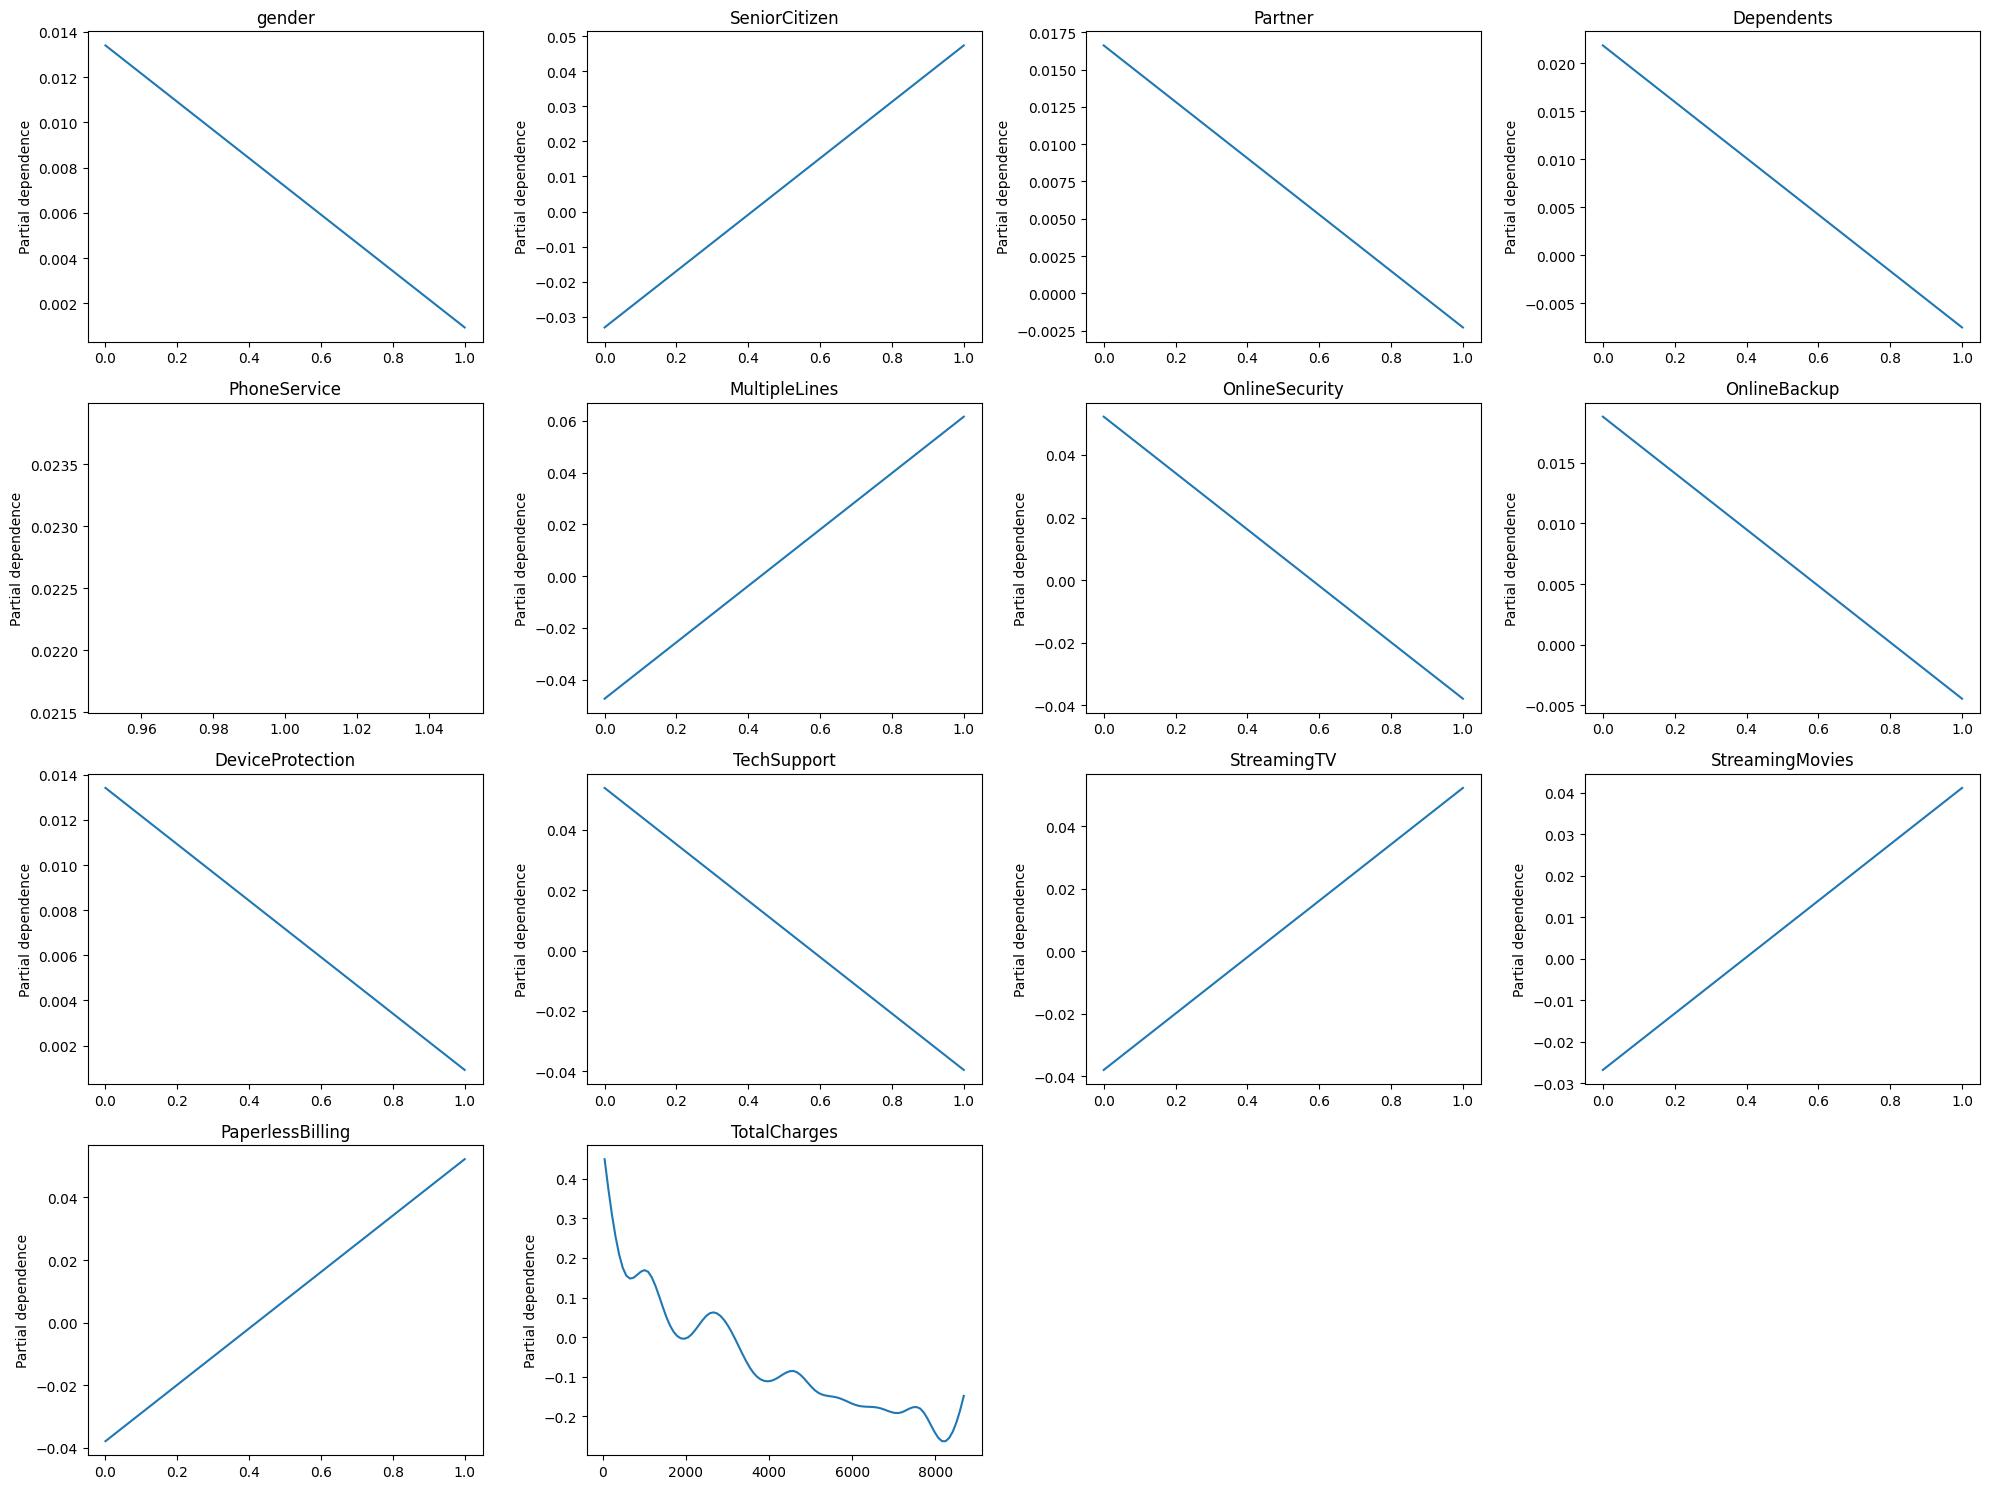

In [206]:
print(f'significant terms: {X.columns[1]}, {X.columns[4]}, {X.columns[5]}, {X.columns[6]}, {X.columns[9]}, {X.columns[10]}, {X.columns[11]}, {X.columns[12]}, {X.columns[13]}')


# Visualize GAM (Code from Interpretable ML notebook on course github [https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/generalized-models-interpretability.ipynb])


plt.figure(figsize=(20, 15))
for i, term in enumerate(final_GAM.terms):
    if i == 14:
      continue
    if term.isintercept:
        continue
    plt.subplot(4, 4, i+1)
    XX = final_GAM.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], final_GAM.partial_dependence(term=i, X=XX))
    plt.title(X.columns[i])
    plt.ylabel('Partial dependence')
plt.tight_layout()
plt.show()


For the GAM, the significant terms were: SeniorCitizen, PhoneService, MultipleLines, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, TotalCharges.

The plot shows that, unlike with linear and logistic regression, TotalCharges was significant in the GAM model, primarily when people had either very low or very high total charges. It seems like people with low spending were more likely to discontinue their service, and people with high spending were less likely, which makes intuitive sense. The relationship appears to be slightly non-linear though, which may be why it was not useful in the logistic or linear regressions, but was in the GAM.

**Model Comparisons**

Based on these results I would suggest the company to use a linear regression model. Compared to the logistic regression and GAM, linear regressions are more easily interpretable (since you can just inspect the weight of each coefficient). For logistic models the coefficients are still pretty interpretable, but not as intuitive, and may be harder to explain to stakeholders. GAM's are further complicated by the introduction of splines an the numerous functions that are used to make a prediction.

While the GAM performed slightly better (1.73 vs 1.78) than the linear regression, I would not reccomend using it. If the company had a strong need to acheive even maximum performance, they could look into optimizing the GAM model. However my reccomendation would be to use the linear regression model due to it's simplicity and interpretability, with negligably worse performance.

